### Load and parse metrics

In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np


def load_metrics_from_file(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

### List experiments

In [2]:
files = [
    '3-blocks_1-layers_1-timesteps.json',
    '3-blocks_1-layers_2-timesteps.json',
    '3-blocks_1-layers_4-timesteps.json',
    '3-blocks_1-layers_8-timesteps.json',
    '3-blocks_2-layers_1-timesteps.json',
    '3-blocks_2-layers_2-timesteps.json',
    '3-blocks_2-layers_4-timesteps.json',
    '3-blocks_2-layers_8-timesteps.json',
    '3-blocks_3-layers_1-timesteps.json',
    '3-blocks_3-layers_2-timesteps.json',
    '3-blocks_3-layers_4-timesteps.json',
    '3-blocks_3-layers_8-timesteps.json'
]

files = ['logs/' + file for file in files]

### Plot val accuracies for all experimnets on one plot

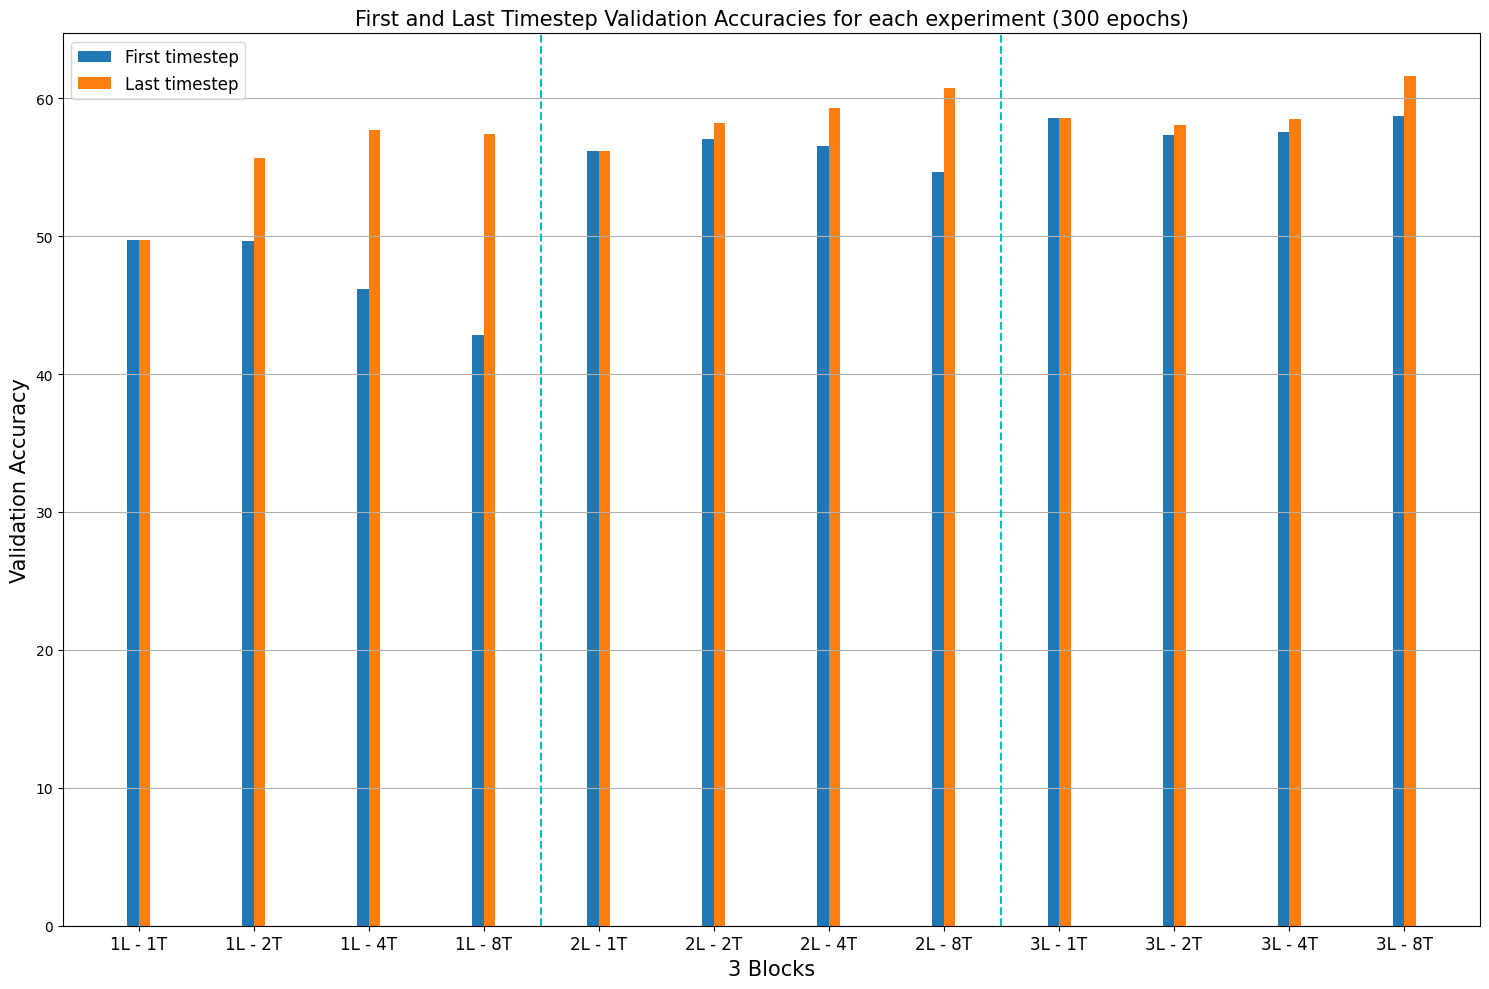

In [3]:
def plot_first_last_val_accuracies(file_names):
    first_timestep_accs = []
    last_timestep_accs = []
    labels = []

    for file_name in file_names:
        metrics = load_metrics_from_file(file_name)
        val_accuracies_epoch = metrics['val_accuracies_epoch']
        # Extract first and last timestep accuracies
        first_timestep_accs.append(val_accuracies_epoch[-1][0])
        last_timestep_accs.append(val_accuracies_epoch[-1][-1])
        # Extract experiment label from filename
        parts = file_name.split("_")
        label = f"{parts[1][0]}L - {parts[2][0]}T"
        labels.append(label)

    x = np.arange(len(labels))  # the label locations
    width = 0.1  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 10))

    ax.bar(x - width/2, first_timestep_accs, width, label='First timestep')
    ax.bar(x + width/2, last_timestep_accs, width, label='Last timestep')

    ax.set_ylabel('Validation Accuracy', fontsize=15)
    ax.set_xlabel('3 Blocks', fontsize=15)
    ax.set_title('First and Last Timestep Validation Accuracies for each experiment (300 epochs)', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12)
    ax.legend(fontsize=12)

    ax.grid(axis='y')

    # Add vertical lines
    for i in range(1, len(labels) // 4):
        ax.axvline(x=4*i - 0.5, color='c', linestyle='--')

    fig.tight_layout()

    plt.show()

plot_first_last_val_accuracies(files)

### Plot val acc plot for all timesteps per experiment

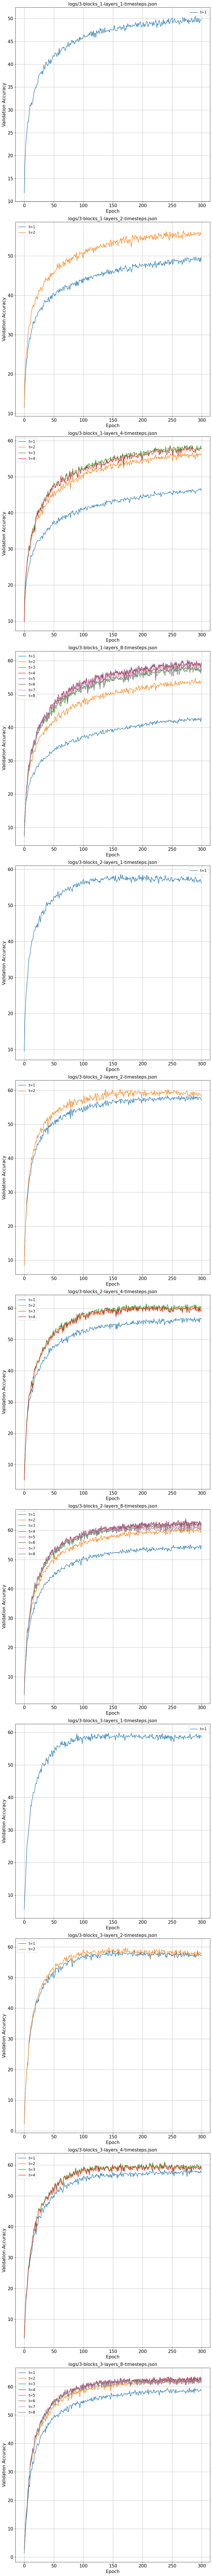

In [4]:
def plot_val_accuracies_over_epochs_for_all_files(file_paths):
    fig, axs = plt.subplots(len(file_paths), 1, figsize=(10, 10*len(file_paths)))

    for i, file_path in enumerate(file_paths):
        metrics = load_metrics_from_file(file_path)
        val_accuracies = metrics['val_accuracies_epoch']

        epochs = list(range(len(val_accuracies))) 
        num_timesteps = len(val_accuracies[0])

        for j in range(num_timesteps):  
            accuracy_in_t_through_epochs = [val_acc_per_epoch[j] for val_acc_per_epoch in val_accuracies]
            axs[i].plot(epochs, accuracy_in_t_through_epochs, label=f't={j+1}')

        axs[i].set_ylabel('Validation Accuracy', fontsize=15)
        axs[i].set_xlabel('Epoch', fontsize=15)
        axs[i].set_title(file_path, fontsize=15)  # Use file path as title
        axs[i].tick_params(labelsize=15)
        axs[i].legend(fontsize=12)
        axs[i].grid()

    plt.tight_layout()
    plt.show()


plot_val_accuracies_over_epochs_for_all_files(files)
